In [1]:
import torch
from torch import optim, nn
import numpy as np
from utils.loader import ScatterData, train_test_split_torch,train_test_split_torch_stratify
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, InterpolationMode, ToTensor
from models.generator import get_model
from models.training import train
from tqdm.auto import tqdm

### DataLoaders

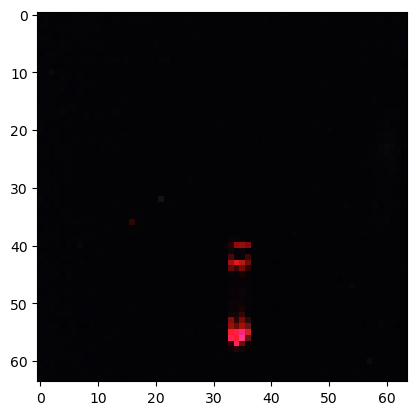

In [2]:
dset=ScatterData(path=r'C:\Users\sedau\Desktop\AIC Group\ML\HSP_ML_seda\LASER_SCREEN_IMAGES\First Setup\alltogether',
                 transform=Compose([ToTensor(),
                                    Resize([64,64],interpolation=InterpolationMode.NEAREST)]),
                 verbose=False)

train_loader,valid_loader=train_test_split_torch(dset,validation_split=0.2,shuffle_dataset=True,batch_size=5)

# visualize
(x,y)=dset[100]
x=x.permute(1,2,0).numpy()
x=x*127.5+127.5
plt.imshow(x.astype('uint'))

### Model

In [12]:
model_resnet=get_model('resnet50',feat=64)
model_resnet

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\sedau/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Training

In [13]:
lr = 1e-3
history = train(model=model_resnet,
      optimizer=torch.optim.Adam(model_resnet.parameters(), lr=lr),
      loss_fn=nn.BCELoss(),
      train_loader=train_loader,
      valid_loader=valid_loader,
      epochs=5,
      device='cpu',
      verbose=True,
      path=r'C:\Users\sedau\Desktop\AIC Group\ML\HSP_ML_seda\weights',
      fname = 'solubility_lr_'+str(lr),
      update=1)

  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 0,train loss: 64.07253482937813, valid loss: 15.590906620025635, train acc: 0.6826347305389222, valid acc: 0.768


 20%|██        | 1/5 [03:04<12:18, 184.61s/it]

epoch: 1,train loss: 56.2152144908905, valid loss: 15.327452465891838, train acc: 0.7405189620758483, valid acc: 0.84


 40%|████      | 2/5 [06:03<09:04, 181.38s/it]

epoch: 2,train loss: 52.25073882937431, valid loss: 13.595699101686478, train acc: 0.780439121756487, valid acc: 0.864


 60%|██████    | 3/5 [09:00<05:58, 179.41s/it]

epoch: 3,train loss: 51.94640104472637, valid loss: 11.290224403142929, train acc: 0.8063872255489022, valid acc: 0.824


 80%|████████  | 4/5 [12:00<02:59, 179.34s/it]

epoch: 4,train loss: 49.684786051511765, valid loss: 13.946356609463692, train acc: 0.7904191616766467, valid acc: 0.832


100%|██████████| 5/5 [15:32<00:00, 186.55s/it]


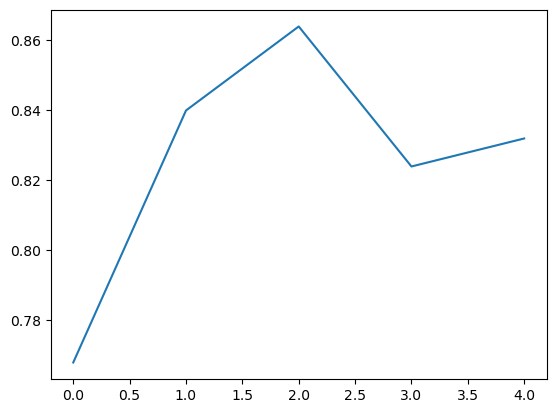

In [14]:
plt.plot(history.test_acc)

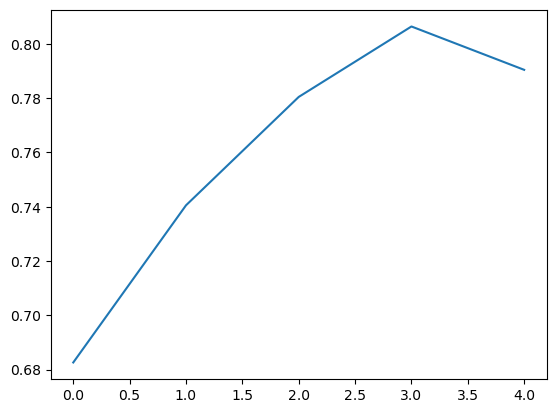

In [16]:
plt.plot(history.train_acc)